Advanced Convolutional Neural Networks (CNNs) with CIFAR-10 and CIFAR-100 dataset
=========

In this experimentation, we are investigating impact of changing the hyperparameters on the final result

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Training with SGD optimizer
Epoch 1/40
313/313 [==============================] - 5s 15ms/step - loss: 1.9899 - accuracy: 0.2720 - val_loss: 1.7893 - val_accuracy: 0.3581
Epoch 2/40
313/313 [==============================] - 4s 13ms/step - loss: 1.6009 - accuracy: 0.4189 - val_loss: 1.3992 - val_accuracy: 0.4907
Epoch 3/40
313/313 [==============================] - 4s 13ms/step - loss: 1.4004 - accuracy: 0.4919 - val_loss: 1.2430 - val_accuracy: 0.5542
Epoch 4/40
313/313 [==============================] - 4s 14ms/step - loss: 1.2646 - accuracy: 0.5427 - val_loss: 1.1459 - val_accuracy: 0.6000
Epoch 5/40
313/313 [==============================] - 4s 13ms/step - loss: 1.1524 - accuracy: 0.5873 - val_loss: 1.0291 - val_accuracy: 0.6413
Epoch 6/40
313/313 [==============================] - 4s 13ms/step - loss: 1.0666 - accuracy: 0.6180 - val_loss: 0.9767 - val_accuracy: 0.6554
Epoch 7/40
313/313 [==============================] - 5s 16ms/step - loss: 0.9887 - accuracy: 0.6496 - val_loss: 

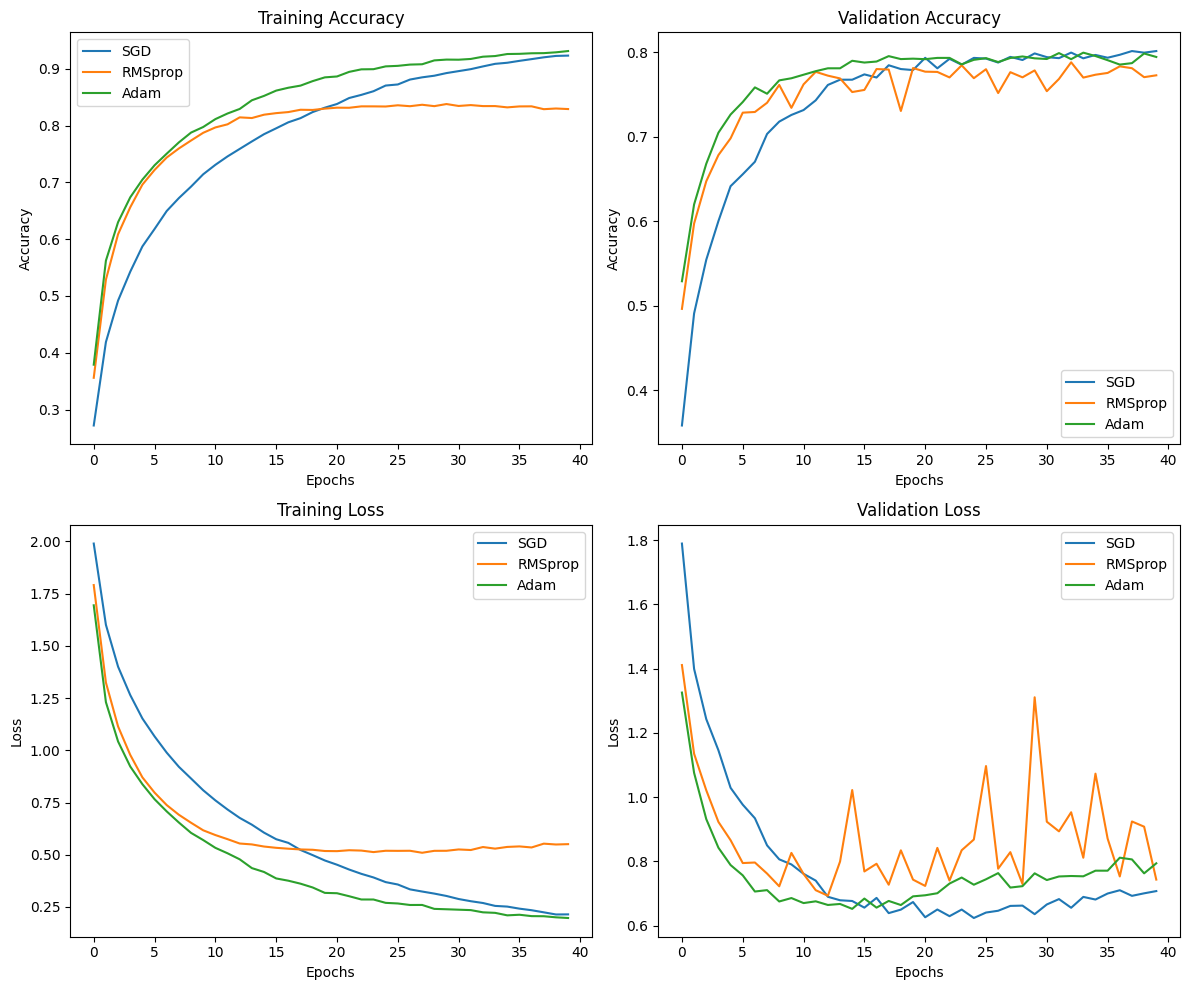

In [ ]:
#Changing the optimizers
# Importing necessary libraries and modules
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop
import numpy as np
import matplotlib.pyplot as plt

# Loading the CIFAR-10 dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()

# Convert labels to categorical format and normalize pixel values
output_Y_train = utils.to_categorical(output_y_train, 10)
output_Y_test = utils.to_categorical(output_y_test, 10)
input_X_train = input_X_train.astype('float32') / 255
input_X_test = input_X_test.astype('float32') / 255

# Define constants
BATCH_SIZE = 128
N_EPOCH = 40
VERBOSE = 1
VALIDATION_SPLIT = 0.2

# List of optimizers to test
optimizers = [SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True), RMSprop(), Adam()]

# Dictionary to store results
results = {}

# Loop over optimizers
for optim in optimizers:
    print(f"\nTraining with {optim.get_config()['name']} optimizer")

    # Model definition
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'),
        Conv2D(32, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    # Compile model with current optimizer
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

    # Train model
    history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH,
                        validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

    # Evaluate model
    score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
    print(f"Test score/loss: {score[0]}, Test accuracy: {score[1]}")

    # Store results in dictionary
    results[optim.get_config()['name']] = {
        'train_acc': history.history['accuracy'],
        'val_acc': history.history['val_accuracy'],
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    }

# Plotting results
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax = ax.ravel()

for i, key in enumerate(results):
    ax[0].plot(results[key]['train_acc'], label=f'{key}')
    ax[1].plot(results[key]['val_acc'], label=f'{key}')
    ax[2].plot(results[key]['train_loss'], label=f'{key}')
    ax[3].plot(results[key]['val_loss'], label=f'{key}')

ax[0].set_title('Training Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].set_title('Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

ax[2].set_title('Training Loss')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend()

ax[3].set_title('Validation Loss')
ax[3].set_xlabel('Epochs')
ax[3].set_ylabel('Loss')
ax[3].legend()

plt.tight_layout()
plt.show()


Libraries imported.
Main variables initialised.
Image variables initialised.
170498071/170498071 [==============================] - 2s 0us/step
input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Training with 10 epochs:
Epoch 1/10
313/313 [==============================] - 10s 17ms/step - loss: 1.7414 - accuracy: 0.3696 - val_loss: 1.4723 - val_accuracy: 0.4811
Epoch 2/10
313/313 [==============================] - 4s 14ms/step - loss: 1.2977 - accuracy: 0.5365 - val_loss: 1.0706 - val_accuracy: 0.6188
Epoch 3/10
313/313 [==============================] - 4s 14ms/step - loss: 1.0883 - accuracy: 0.6166 - val_loss: 0.9986 - val_accuracy: 0.6483
Epoch 4/10
313/313 [==============================] - 5s 15ms/step - loss: 0.9567 - accuracy: 0.6631 - val_loss: 0.8663 - val_accuracy: 0.6982
Epoch 5/10
313/313 [==============================] - 5s 15ms/step - loss: 0.8538 - accuracy: 0.7024 - val_loss: 0.8721 - val_accuracy: 0.6957
Epoch 6/10
313/313 [================

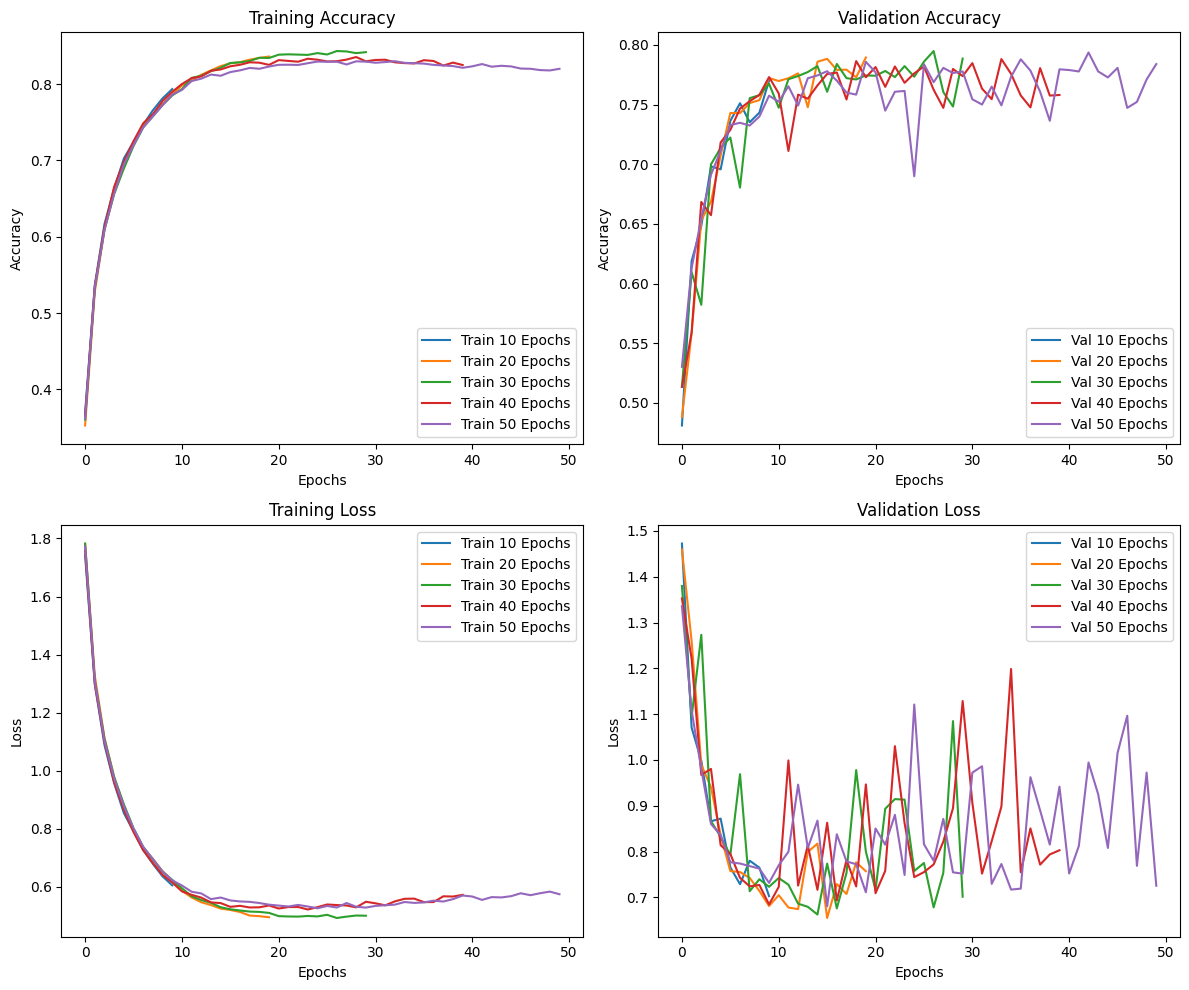

In [ ]:
# Import necessary modules for CIFAR-10 CNN
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import RMSprop
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

# Training constants
BATCH_SIZE = 128
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

print('Main variables initialised.')

# CIFAR-10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialised.')

# Load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

# Convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES)

# Float and normalization
input_X_train = input_X_train.astype('float32') / 255
input_X_test = input_X_test.astype('float32') / 255

# List of epochs to test
epochs_list = [10, 20, 30, 40, 50]

# Dictionary to store history for different epochs
history_dict = {}

# Loop over each number of epochs
for N_EPOCHS in epochs_list:
    print(f"Training with {N_EPOCHS} epochs:")

    # Define model
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS), activation='relu'),
        Conv2D(32, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(N_CLASSES, activation='softmax')
    ])

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

    # Train the model
    history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

    # Store history in dictionary
    history_dict[N_EPOCHS] = history.history

    # Evaluate the model
    score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
    print("\nTest score/loss:", score[0])
    print('Test accuracy:', score[1])

# Plotting results
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax = ax.ravel()

for i, N_EPOCHS in enumerate(epochs_list):
    ax[0].plot(history_dict[N_EPOCHS]['accuracy'], label=f'Train {N_EPOCHS} Epochs')
    ax[1].plot(history_dict[N_EPOCHS]['val_accuracy'], label=f'Val {N_EPOCHS} Epochs')
    ax[2].plot(history_dict[N_EPOCHS]['loss'], label=f'Train {N_EPOCHS} Epochs')
    ax[3].plot(history_dict[N_EPOCHS]['val_loss'], label=f'Val {N_EPOCHS} Epochs')

ax[0].set_title('Training Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].set_title('Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

ax[2].set_title('Training Loss')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend()

ax[3].set_title('Validation Loss')
ax[3].set_xlabel('Epochs')
ax[3].set_ylabel('Loss')
ax[3].legend()

plt.tight_layout()
plt.show()



Current Model Summary:
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (

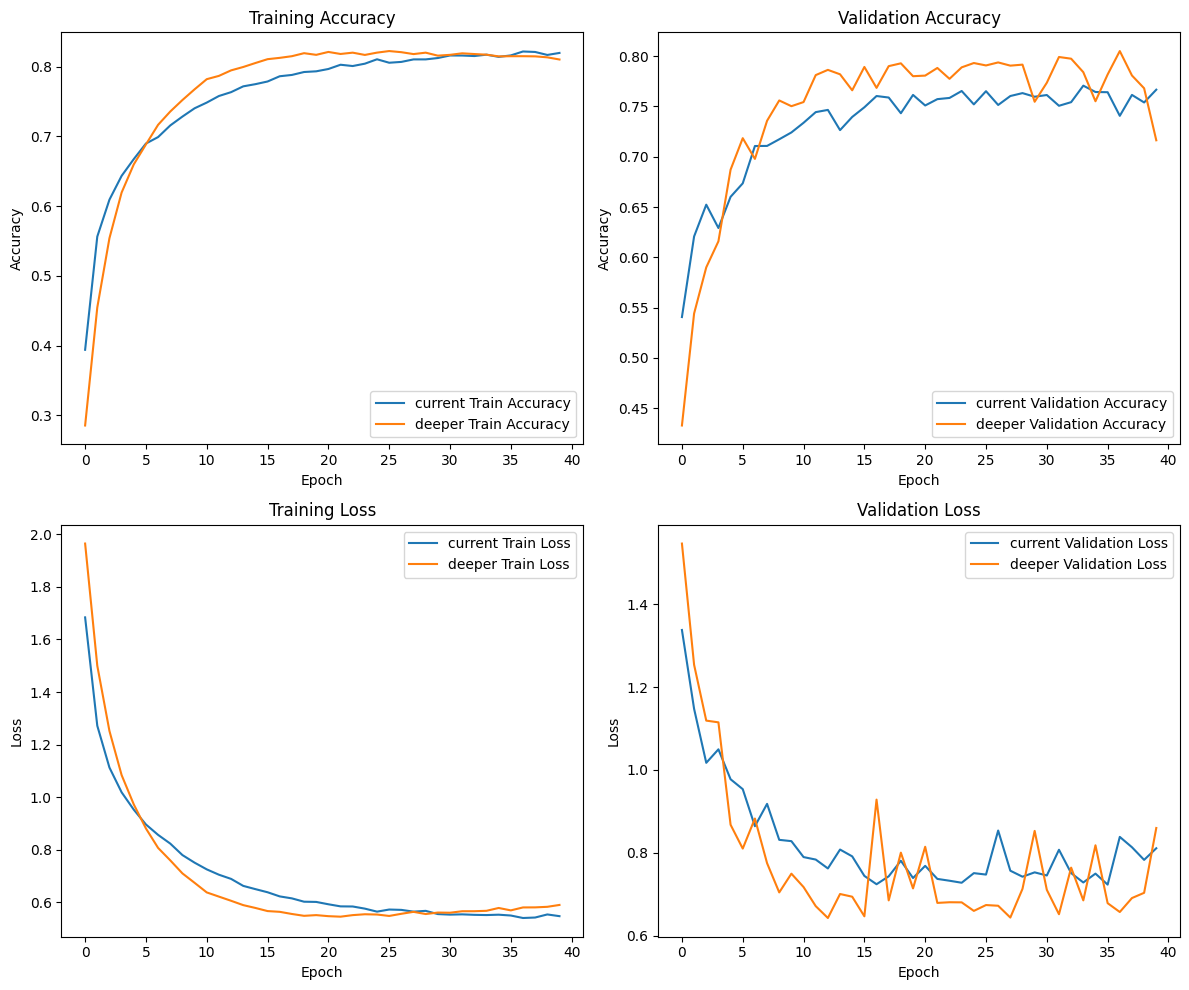

In [ ]:
# comparison of given vs deeper network architecture, with early stopping applied
# Importing necessary libraries and modules
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()

# Convert labels to categorical format and normalize pixel values
output_Y_train = utils.to_categorical(output_y_train, 10)
output_Y_test = utils.to_categorical(output_y_test, 10)
input_X_train = input_X_train.astype('float32') / 255
input_X_test = input_X_test.astype('float32') / 255

# Define constants
BATCH_SIZE = 128
N_EPOCH = 40
VERBOSE = 1
VALIDATION_SPLIT = 0.2
N_CLASSES = 10
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32
OPTIM = RMSprop()

# Define the CNN model with variable depth
def create_cnn_model(deeper=False):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS), activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Additional layers for deeper models
    if deeper:
        model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
        model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
        model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(N_CLASSES, activation='softmax'))
    return model

# Early Stopping Callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Store results
results = {}

# Configure models for 'current' and 'deeper'
configs = ['current', 'deeper']

for config in configs:
    # Create and compile model
    model = create_cnn_model(deeper=(config == 'deeper'))
    model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

    # Print model summary
    print(f"\n{config.capitalize()} Model Summary:")
    model.summary()

    # Train model with Early Stopping
    print(f"\nTraining the {config} model with Early Stopping...")
    history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH,
                        validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[early_stop])

    # Store results
    results[config] = history.history

    # Evaluate model
    score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
    results[config]['test_score'] = score[0]
    results[config]['test_accuracy'] = score[1]
    print(f"{config.capitalize()} Model - Test score/loss: {score[0]}, Test accuracy: {score[1]}")

# Plotting results for training and validation
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax = ax.ravel()

for i, config in enumerate(configs):
    ax[0].plot(results[config]['accuracy'], label=f'{config} Train Accuracy')
    ax[1].plot(results[config]['val_accuracy'], label=f'{config} Validation Accuracy')
    ax[2].plot(results[config]['loss'], label=f'{config} Train Loss')
    ax[3].plot(results[config]['val_loss'], label=f'{config} Validation Loss')

ax[0].set_title('Training Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].set_title('Validation Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

ax[2].set_title('Training Loss')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Loss')
ax[2].legend()

ax[3].set_title('Validation Loss')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Loss')
ax[3].legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/40
313/313 [==============================] - 5s 14ms/step - loss: 2.1521 - accuracy: 0.1829 - val_loss: 2.0329 - val_accuracy: 0.2394
Epoch 2/40
313/313 [==============================] - 3s 11ms/step - loss: 1.9400 - accuracy: 0.2693 - val_loss: 1.7924 - val_accuracy: 0.3297
Epoch 3/40
313/313 [==============================] - 3s 11ms/step - loss: 1.7117 - accuracy: 0.3558 - val_loss: 1.5848 - val_accuracy: 0.4080
Epoch 4/40
313/313 [==============================] - 3s 11ms/step - loss: 1.5826 - accuracy: 0.4139 - val_loss: 1.4601 - val_accuracy: 0.4613
Epoch 5/40
313/313 [==============================] - 4s 12ms/step - loss: 1.4849 - accuracy: 0.4539 - val_loss: 1.3964 - val_accuracy: 0.4927
Epoch 6/40
313/313 [==============================] - 3s 11ms/step - loss: 1.4006 - accuracy: 0.4877 - val_loss: 1.3137 - val_accuracy: 0.5222
Epoch 7/40
313/313 [==============================] - 3s 11ms/step - loss: 1.3371 - accuracy: 0.5117 - val_loss: 1.2100 - val_accuracy: 0.5618

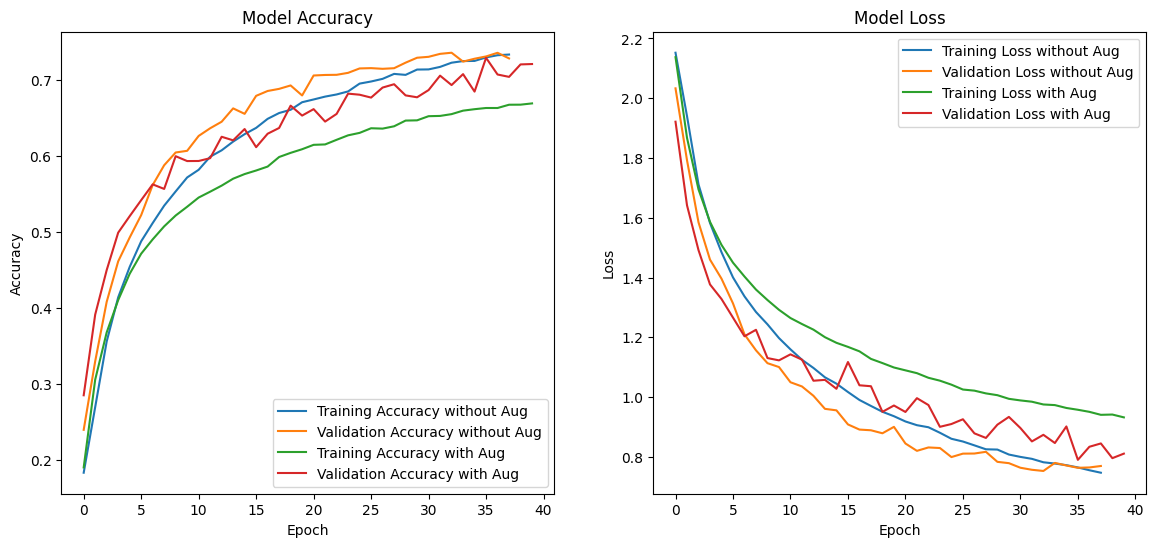

Without data augmentation - Test loss: 0.7589280009269714 Test accuracy: 0.7373999953269958
With data augmentation - Test loss: 0.8111889958381653 Test accuracy: 0.7211999893188477


In [ ]:
# comparison between not doing data augmentation vs using data augmentation
# Importing necessary libraries and modules
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()

# Convert labels to categorical format and normalize pixel values
output_Y_train = to_categorical(output_y_train, 10)
output_Y_test = to_categorical(output_y_test, 10)
input_X_train = input_X_train.astype('float32') / 255
input_X_test = input_X_test.astype('float32') / 255

# Define constants
BATCH_SIZE = 128
N_EPOCH = 40
VERBOSE = 1
VALIDATION_SPLIT = 0.2
N_CLASSES = 10
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

# Define the CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS), activation='relu'),
        Conv2D(32, kernel_size=3, padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(64, kernel_size=3, padding='same', activation='relu'),
        Conv2D(64, 3, 3, activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(N_CLASSES, activation='softmax')
    ])
    return model

# Compile the model
model = create_cnn_model()
optimizer = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early stopping setup
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model without data augmentation
history_no_aug = model.fit(input_X_train, output_Y_train,
                           batch_size=BATCH_SIZE,
                           epochs=N_EPOCH,
                           validation_split=VALIDATION_SPLIT,
                           verbose=VERBOSE, callbacks=[early_stop])

# Evaluate the model without data augmentation
score_no_aug = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)

# Data augmentation setup
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Compile the model again (reset weights)
model = create_cnn_model()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'], )



# Train the model with data augmentation
history_aug = model.fit(datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE),
                        steps_per_epoch=len(input_X_train) / BATCH_SIZE,
                        epochs=N_EPOCH,
                        validation_data=(input_X_test, output_Y_test),
                        verbose=VERBOSE,
                        callbacks=[early_stop])

# Evaluate the model with data augmentation
score_aug = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)

# Plotting training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history_no_aug.history['accuracy'], label='Training Accuracy without Aug')
plt.plot(history_no_aug.history['val_accuracy'], label='Validation Accuracy without Aug')
plt.plot(history_aug.history['accuracy'], label='Training Accuracy with Aug')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy with Aug')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_no_aug.history['loss'], label='Training Loss without Aug')
plt.plot(history_no_aug.history['val_loss'], label='Validation Loss without Aug')
plt.plot(history_aug.history['loss'], label='Training Loss with Aug')
plt.plot(history_aug.history['val_loss'], label='Validation Loss with Aug')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

print("Without data augmentation - Test loss:", score_no_aug[0], "Test accuracy:", score_no_aug[1])
print("With data augmentation - Test loss:", score_aug[0], "Test accuracy:", score_aug[1])


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Training base model...
Epoch 1/40
313/313 [==============================] - 7s 16ms/step - loss: 4.2645 - accuracy: 0.0508 - val_loss: 3.7977 - val_accuracy: 0.1205
Epoch 2/40
313/313 [==============================] - 4s 13ms/step - loss: 3.6782 - accuracy: 0.1396 - val_loss: 3.4116 - val_accuracy: 0.1903
Epoch 3/40
313/313 [==============================] - 6s 18ms/step - loss: 3.2861 - accuracy: 0.2111 - val_loss: 3.0317 - val_accuracy: 0.2655
Epoch 4/40
313/313 [==============================] - 4s 14ms/step - loss: 3.0094 - accuracy: 0.2608 - val_loss: 2.8875 - val_accuracy: 0.2931
Epoch 5/40
313/313 [==============================] - 4s 13ms/step - loss: 2.7870 - accuracy: 0.3031 - val_loss: 2.6969 - val_accuracy: 0.3316
Epoch 6/40
313/313 [==============================] - 4s 14ms/step - loss: 2.6066 - accuracy: 0.3364 - val_loss: 2.6382 - val_accuracy: 0.3419
Epoch 7/40
313/313 [==============================] - 4s 13ms/step - loss: 2.4583 - accuracy: 0.3711 - val_loss: 2.461

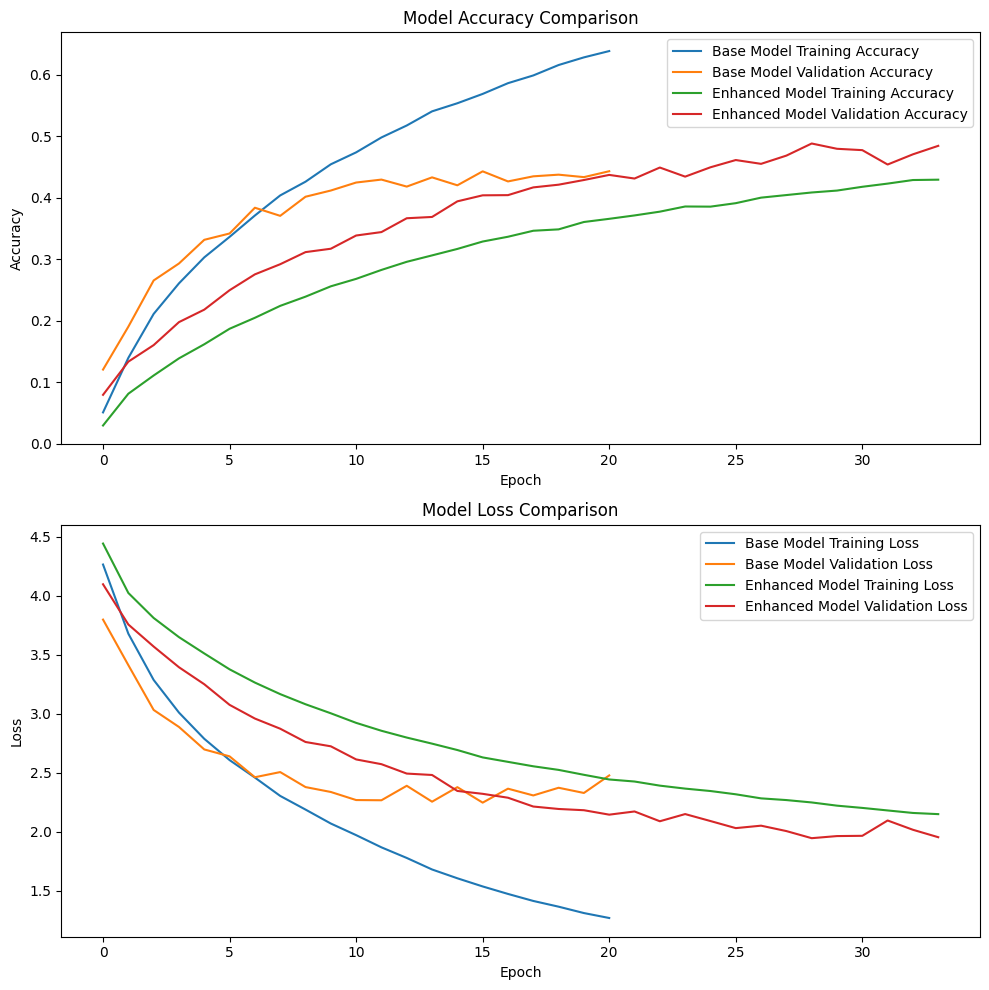

In [ ]:
#import necessary libraries and modules
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

#load CIFAR-100 dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar100.load_data()

#convert labels to categorical format and normalize pixel values
output_Y_train = to_categorical(output_y_train, 100)
output_Y_test = to_categorical(output_y_test, 100)
input_X_train = input_X_train.astype('float32') / 255
input_X_test = input_X_test.astype('float32') / 255

#define constants
BATCH_SIZE = 128
N_EPOCH = 40
VERBOSE = 1
N_CLASSES = 100
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32
OPTIM = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

#define the simple CNN model
def create_simple_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS), activation='relu'),
        Conv2D(32, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(N_CLASSES, activation='softmax')
    ])
    return model

# early stopping and Data Augmentation Setup
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, fill_mode='nearest')
datagen.fit(input_X_train)

#initialize dictionaries to store results
results = {}

#train Base Model
base_model = create_simple_cnn_model()
base_model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
print("\nTraining base model...")
base_history = base_model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[early_stop])
results['Base Model'] = base_history.history

#train Enhanced Model with Deeper Architecture and Data Augmentation
enhanced_model = create_simple_cnn_model()  # You can modify this function for a deeper model
enhanced_model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
print("\nTraining enhanced model with data augmentation and early stopping...")
enhanced_history = enhanced_model.fit(datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE), epochs=N_EPOCH, validation_data=(input_X_test, output_Y_test), verbose=VERBOSE, callbacks=[early_stop])
results['Enhanced Model'] = enhanced_history.history

#plotting training & validation accuracy and loss values
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(results['Base Model']['accuracy'], label='Base Model Training Accuracy')
ax[0].plot(results['Base Model']['val_accuracy'], label='Base Model Validation Accuracy')
ax[0].plot(results['Enhanced Model']['accuracy'], label='Enhanced Model Training Accuracy')
ax[0].plot(results['Enhanced Model']['val_accuracy'], label='Enhanced Model Validation Accuracy')
ax[0].set_title('Model Accuracy Comparison')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(results['Base Model']['loss'], label='Base Model Training Loss')
ax[1].plot(results['Base Model']['val_loss'], label='Base Model Validation Loss')
ax[1].plot(results['Enhanced Model']['loss'], label='Enhanced Model Training Loss')
ax[1].plot(results['Enhanced Model']['val_loss'], label='Enhanced Model Validation Loss')
ax[1].set_title('Model Loss Comparison')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()
plt.show()
